In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
filepath = '/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv'
data = pd.read_csv(filepath)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

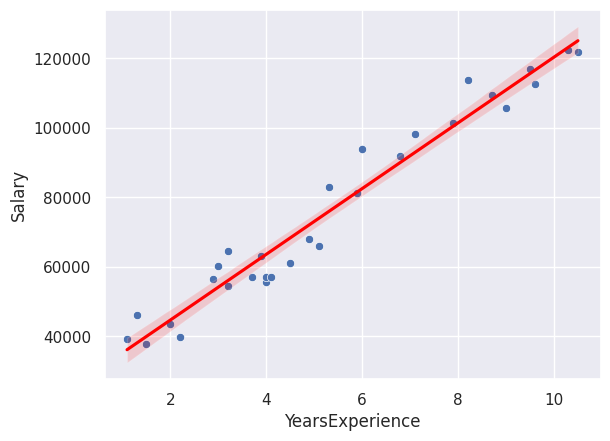

In [5]:
sns.scatterplot(x=data['YearsExperience'], y=data['Salary'])

sns.regplot(x=data['YearsExperience'], y=data['Salary'], color='red', scatter=False)

In [6]:
x=data[['YearsExperience']]
y=data['Salary']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred
X_test

,YearsExperience,actual,predicted
27,9.6,112635.0,115790.210113
15,4.9,67938.0,71498.278095
23,8.2,113812.0,102596.868661
17,5.3,83088.0,75267.804224
8,3.2,64445.0,55477.792045
9,3.7,57189.0,60189.699707


In [11]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Print model performance for testing set
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 6286.453830757749
MSE is 49830096.85590839
RMSE is 7059.04362190151
R2 score is 0.9024461774180497
